## NBA Playoff Match Day Performance Predictor Report
##### By Data Denizens: Jesus Rojas, Dinh Dang Khoa Tran, Duc Tam Nguyen, Daniel Rodriguez, Chi Hieu Nguyen
Link to Notebook: https://github.com/uic-cs418/group-project-data-denizens/blob/main/CS418Final_report.ipynb

#### Project Introduction

Our project analyzes and predicts NBA playoff performance for teams and players using regular season stats and results against playoff-caliber opponents. Playoff basketball differs significantly as there is slower pace, tougher defense, and strategic rotations which makes regular season averages less predictive.
To improve accuracy, we focus on how teams perform specifically against other playoff-bound teams, which better reflects postseason intensity. This approach supports stakeholders like coaches and analysts in identifying who performs under pressure. Our motivation comes from both a passion for basketball and the NBA’s rich analytical potential.


### Data cleaning
Link to Data: https://github.com/swar/nba_api

Data cleaning is done in the team_visuals.py and player_visuals.py files. Additionally, in get_data.py the NBA API is used to fetch regular season and playoff game schedules by leaguegamefinder, filtered by season and type (e.g. "Regular Season", "Playoffs"). A copy of the data can be found in the **player_avg_stats** files in our repository.
- fetch_bbr_player_avg_stats(season) pulls regular season player stats.
- fetch_bbr_playoffs_stats(season) pulls playoff player stats.
- Columns like "Awards" and "Rk" are removed if present.
- All column names are converted to lowercase.
- Other numeric columns are also cleaned and missing values are filled with medians.
- Percentage columns ("fgpct", "3pct", etc.) are converted to numeric and filled with the median if missing or non-numeric.

The structure of the data is a structured tabular format, the scope of the data is across 3 NBA regular and playoff seasons, as well as the current 2025 season. The temporality of the data is seasonal and chronological. The faithfulness of the data is high because it utilizes the NBA API and stats from the respected Basketball Reference website. The granularity of the dataset is at the player-season level, where each row corresponds to a single player's aggregated statistics for a given season. This includes both regular season and playoff data. The dataset is structured to enable season-over-season comparisons and player-level analysis.

### EDA & Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import player_visuals 
import team_visuals
import get_data
import warnings
import os
from get_data import fetch_bbr_player_avg_stats, fetch_bbr_playoffs_stats 
warnings.filterwarnings("ignore", category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### Data Preparation

First, we need to fetch and preprocess our data using out data cleaner.

In [2]:
from player_visuals import load_all_stats, compare_fg_percentage, plot_fg_percentage_scatter
regular_stats, playoff_stats = load_all_stats()
regular_stats.describe().round(2)

Fetching data for multiple seasons...
Combined regular season data shape: (2229, 30)
Combined playoff data shape: (648, 30)


,age,team,g,gs,mp,fg,fga,fgpct,3p,3pa,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season
count,2226.00,2229.0,2226.00,2226.00,2226.00,2226.00,2226.00,2203.00,2226.00,2226.00,...,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2229.0
mean,26.08,0.0,40.11,18.29,18.63,3.02,6.56,0.45,0.92,2.64,...,0.82,2.52,3.34,1.91,0.59,0.37,0.99,1.56,8.20,0.0
std,4.24,0.0,25.58,24.85,9.62,2.32,4.74,0.12,0.85,2.20,...,0.74,1.75,2.32,1.84,0.41,0.38,0.79,0.80,6.42,0.0
min,19.00,0.0,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,23.00,0.0,16.00,0.00,11.10,1.30,3.10,0.40,0.20,0.90,...,0.30,1.30,1.70,0.70,0.30,0.10,0.43,1.00,3.50,0.0
50%,25.00,0.0,41.00,5.00,17.70,2.40,5.20,0.45,0.70,2.20,...,0.60,2.20,2.90,1.30,0.50,0.30,0.80,1.60,6.50,0.0
75%,29.00,0.0,64.00,29.00,26.58,4.10,8.80,0.50,1.40,3.90,...,1.10,3.40,4.40,2.50,0.80,0.50,1.30,2.10,11.00,0.0
max,42.00,0.0,84.00,83.00,43.50,11.50,23.60,1.00,4.90,11.80,...,5.10,11.00,14.70,10.90,3.00,3.60,4.80,5.00,34.70,0.0


## Regular Season vs. Playoff Performance

### Hypothesis: Players shoot differently in playoffs compared to regular season

It's crucial to know which players maintain or do better in high pressure playoff situations. We can compare field goal percentages between regular season and playoffs to find any patterns.

In [3]:
compare_fg_percentage(regular_stats, playoff_stats)

Number of player-seasons in both regular season and playoffs: 2304
Average difference in FG% (Playoff - Regular): -0.0180
Players with improved FG% in playoffs: 457 (35.7%)
Players with declined FG% in playoffs: 815 (63.6%)
Players with unchanged FG% in playoffs: 9 (0.7%)


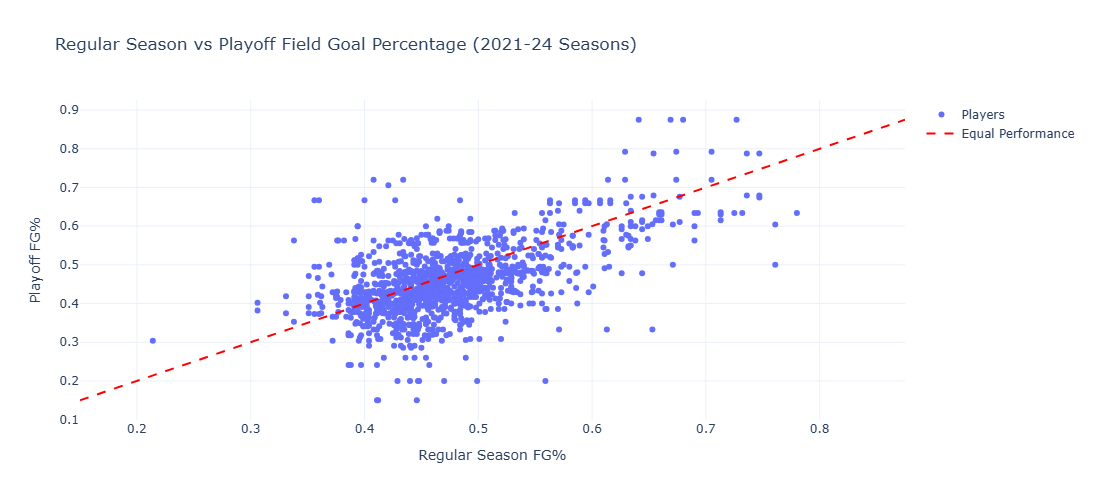

In [9]:
plot_fg_percentage_scatter(regular_stats, playoff_stats)

#### Visualization 1: Takeaways
This visualization clearly shows that a vast majority of players shoot worse in the playoffs, with over 63% experiencing a decline in FG%, suggesting playoff external factors (i.e. increased defensive pressure, fatigue, etc.) play a large role. On average, players shoot around 1.8% worse in the playoffs compared to the regular season.  Despite the overall trend, about 36% of players improved or maintained their shooting efficiency.

### Hypothesis: Overall Win% is not Indicative of Playoff Opponent Win%
Now we will examine which teams perform well against playoff-caliber opponents. This is important to note because we will be able to see which teams are able to perform well against teams they will likely see in the playoffs. 

<Figure size 1000x500 with 0 Axes>

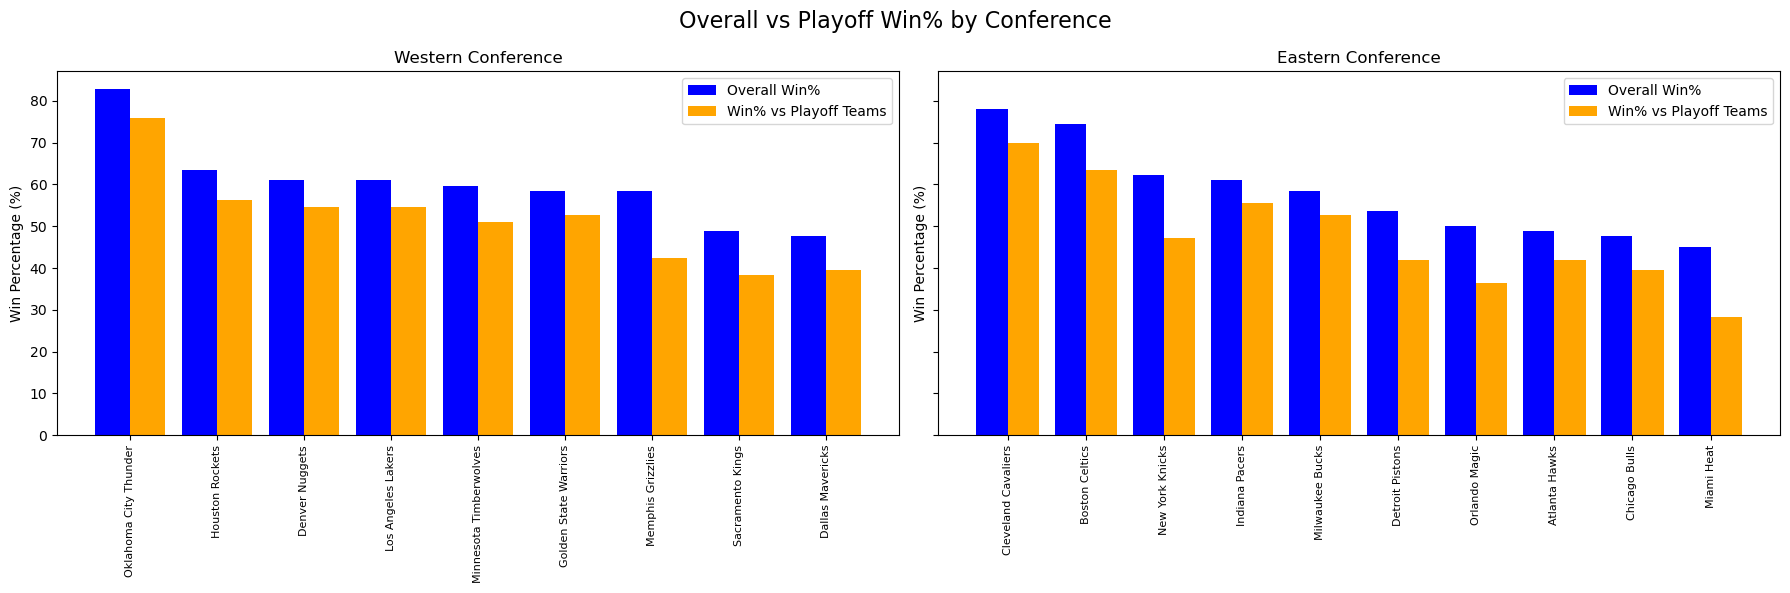

In [5]:
from team_visuals import analyze_win_percentages, team_abbreviation_map, playoff_teams, western_teams, eastern_teams
df_schedule = get_data.fetch_regular_season_schedule(season='2024-25')
plt.figure(figsize=(10, 5))
analyze_win_percentages(df_schedule, team_abbreviation_map, playoff_teams, western_teams + eastern_teams, 'Both')

#### Visualization 2: Takeaways
Most teams in both conferences win less often against playoff-caliber opponents than they do overall. The Miami Heat and Memphis Grizzlies show a noticeable drop, pointing to struggles in tougher matchups. On the other hand, the Cleveland Cavaliers and Oklahoma City Thunder hold up well, showing they can compete with top-tier teams.

## Machine Learning Analysis


### Predicting Shooting % Dropoff Using Random Forest Regression, XGBoost, and Random Forest Classifier Models

In [6]:
import randomforestreg
from randomforestreg import load_and_prepare_data, train_random_forest_with_baseline

X, y = load_and_prepare_data()
model, baseline_mae, baseline_rmse, model_mae, model_rmse = train_random_forest_with_baseline(X, y)

print(f"Random Forest MAE: {model_mae:.4f}")
print(f"Random Forest RMSE: {model_rmse:.4f}")

from xgboostmodel import load_and_prepare_data, train_xgboost

X, y = load_and_prepare_data()
model, mae, rmse = train_xgboost(X, y)

print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")

print(f"\nBaseline MAE: {baseline_mae:.4f}")
print(f"Baseline RMSE: {baseline_rmse:.4f}")


 Random Forest Predictions (sample):
   Actual_Dropoff  RF_Predicted   Error
0          -0.533        0.0203  0.5533
1           0.023       -0.0436 -0.0666
2          -0.032       -0.0366 -0.0046
3          -0.057       -0.0340  0.0230
4          -0.036       -0.0248  0.0112
Random Forest MAE: 0.1134
Random Forest RMSE: 0.1615

 XGBoost Predictions (sample):
   Actual_Dropoff  XGB_Predicted   Error
0          -0.533         0.1010  0.6340
1           0.023         0.1436  0.1206
2          -0.032        -0.0224  0.0096
3          -0.057         0.0401  0.0971
4          -0.036         0.0150  0.0510
XGBoost MAE: 0.1160
XGBoost RMSE: 0.1705

Baseline MAE: 0.1095
Baseline RMSE: 0.1493


In [7]:
from randomforestclassifier import load_classification_data, train_classifier

X_cls, y_cls = load_classification_data(threshold=-0.02)
model = train_classifier(X_cls, y_cls)


 Baseline DummyClassifier Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        68
           1      0.580     1.000     0.734        94

    accuracy                          0.580       162
   macro avg      0.290     0.500     0.367       162
weighted avg      0.337     0.580     0.426       162

 Random Forest Classifier Report:
              precision    recall  f1-score   support

           0      0.548     0.338     0.418        68
           1      0.625     0.798     0.701        94

    accuracy                          0.605       162
   macro avg      0.586     0.568     0.560       162
weighted avg      0.593     0.605     0.582       162



### Predicting Shooting % Dropoff Models: Takeaways
This analysis used Random Forest and XGBoost models to predict how much a player’s shooting percentage drops in the playoffs based on regular season box score statistics. Both models performed only slightly better than a simple baseline, with Random Forest showing a slight advantage in accuracy. A separate classification model aimed to identify players likely to experience a significant decline, defined as more than a two percent drop in field goal percentage, but it struggled to accurately identify those players. The limited performance across models suggests that standard box score statistics such as points, assists, and rebounds do not provide strong predictive power for playoff shooting decline. The observed patterns appear to be influenced more by contextual factors that are not captured in basic statistical summaries. To improve prediction accuracy, models should incorporate more advanced features such as defensive efficiency, shot contest rates, usage patterns, and lineup context. Data from player tracking systems and more detailed analytic datasets may help uncover the underlying reasons behind changes in postseason performance.

## Predicting NBA First‑Round Series Outcomes: Logistic Regression & Monte Carlo Simulation
Goal: Forecast first‑round series wins and assign tiers (Contender, Dark Horse, etc.) using only regular‑season box‐score data.

Core Model: Logistic regression tuned via GridSearchCV (regularization C) with isotonic probability calibration (CalibratedClassifierCV).

Simulation: Monte Carlo best‑of‑7 series via scipy.stats.binom on calibrated win probabilities.

Tiering: Apply clear thresholds (≥70% → Contender, 40–70% → Dark Horse, 20–40% → Even, <20% → Long Shot).

Extras: Optional seed‑based penalty for historical underdogs; %autoreload for live module updates.

Future: Explore non‑linear models (e.g. XGBoost), integrate roster/injury data, and dynamically recalibrate through the playoffs.

In [8]:
# Expose leaguegamefinder in builtins for easier access elsewhere if needed
from nba_api.stats.endpoints import leaguegamefinder
import builtins
builtins.leaguegamefinder = leaguegamefinder

import mc_module

AUC = 0.7462454212454213
best C: 100
cv AUC: 0.8033556210253145
Hold‑out AUC = 0.7369963369963369
Calibrated AUC = 0.7322802197802198
                 team_name  seed  champion (1)             tier
0    Oklahoma City Thunder     1       0.06200        Contender
1          Houston Rockets     2       0.02360   Underperformer
2       Los Angeles Lakers     3       0.07450        Contender
3           Denver Nuggets     4       0.04275          Sleeper
4     Los Angeles Clippers     5       0.00020          Sleeper
5   Minnesota Timberwolves     6       0.00460          Sleeper
6    Golden State Warriors     7       0.00485        Long Shot
7        Memphis Grizzlies     8       0.03180        Long Shot
8      Cleveland Cavaliers     1       0.42550  Title Contender
9           Boston Celtics     2       0.10710  Title Contender
10         New York Knicks     3       0.07790        Contender
11          Indiana Pacers     4       0.06330       Dark Horse
12         Milwaukee Bucks     5  

### Predicting NBA First‑Round Series Outcomes Models: Takeaways
This model builds on the earlier team win percentage chart by predicting each team's chance of winning the title and placing them into categories like Contender or Sleeper. The Boston Celtics are rated as top contenders, aligning with their strong season and consistent results. The Cleveland Cavaliers also rank high, showing strong potential despite less impressive playoff opponent performance. The Indiana Pacers are seen as a dark horse with the possibility to surprise, even though their win rate dropped against stronger teams. These predictions help highlight which teams are most playoff-ready beyond just regular season records. Along with this it gives an acknowledgement and warning of other teams who are possibly in the mix such as the Pacers who are currently on a good run in the playoffs.

## Project Results
This project clearly showed that many players and teams perform differently in the playoffs compared to the regular season. Visualizations revealed that over 60 percent of players see a drop in their field goal percentage during the playoffs, suggesting that tougher defenses and higher pressure play a big role. Most teams also win less often when facing other playoff-level opponents, although top teams like the Celtics, Thunder, and Cavaliers continue to perform well even in these tougher matchups.

To explore this further, machine learning models were used to predict how much a player’s shooting percentage would drop in the playoffs using regular season box score stats. Both Random Forest and XGBoost models were tested, but neither could predict the dropoff very accurately. A classification model was also built to try to identify players with big declines, but it had trouble correctly picking them out. This suggests that basic stats like points and assists do not tell the full story when it comes to playoff performance.

A second model was built to predict each team's chance of winning the championship. It performed fairly well, with an AUC score around 0.75, and grouped teams into tiers such as Contender, Dark Horse, and Sleeper. Teams like the Celtics and Cavaliers were marked as strong contenders, while the Pacers were labeled as a team with potential to surprise.

Overall, this project helped show how much playoff performance can differ from the regular season. The clear dropoff from the majority of players indicates that having a player that is consistently reliable and a overperformer is valuable. This can be a strong motivation to uncover which players meet these standards, but what this project also uncovered was the difficulty to predict those changes using only basic stats. To make better predictions, future models will likely need more detailed data, like defensive matchups, shot quality, and advanced player tracking.
